In [1]:
import numpy as np
import pandas as pd


In [2]:
d = {
    "Country":["France","Spain","Germany","Spain","Germany","France","Spain","France","Germany","France"],
    "Age":[44,27,30,38,40,35,np.nan,48,50,37],
    "Salary":[72000,48000,54000,61000,np.nan,52000,79000,83000,67000,30000],
    "Purchased":["No","Yes","No","No","Yes","Yes","No","Yes","No",np.nan],
    
}

In [3]:
df=  pd.DataFrame(d)
df.shape

(10, 4)

In [4]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,52000.0,Yes
6,Spain,NaN,79000.0,No
7,France,48.0,83000.0,Yes
8,Germany,50.0,67000.0,No
9,France,37.0,30000.0,NaN


In [5]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    1
dtype: int64

In [6]:
#Handling missing values
#1] Purchased columns
df_new = df.copy()
most_frequest_value=df_new.Purchased.mode()[0]

df_new['Purchased'].fillna(most_frequest_value,inplace=True)
df_new

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,52000.0,Yes
6,Spain,NaN,79000.0,No
7,France,48.0,83000.0,Yes
8,Germany,50.0,67000.0,No
9,France,37.0,30000.0,No


In [7]:
df_new.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,60666.666667
std,7.693793,16673.332001
min,27.000000,30000.000000
25%,35.000000,52000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In [8]:
df_new.Salary

0    72000.0
1    48000.0
2    54000.0
3    61000.0
4        NaN
5    52000.0
6    79000.0
7    83000.0
8    67000.0
9    30000.0
Name: Salary, dtype: float64

In [9]:
df_new['Salary'].fillna(df_new['Salary'].mean(),inplace=True)

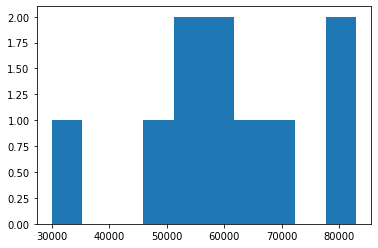

In [10]:
#2] salary columns
from matplotlib import pyplot as plt
plt.hist(df_new.Salary)
plt.show()


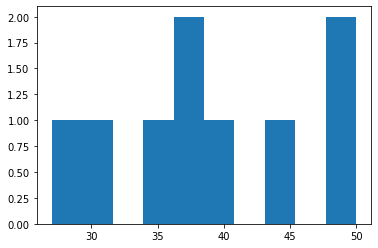

In [11]:
plt.hist(df_new['Age'])
plt.show()


In [12]:
df_new['Age'].fillna(df_new['Age'].mean(),inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new["Purchased"]=le.fit_transform(df_new["Purchased"])


In [14]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [15]:
df_new

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,60666.666667,1
5,France,35.000000,52000.000000,1
6,Spain,38.777778,79000.000000,0
7,France,48.000000,83000.000000,1
8,Germany,50.000000,67000.000000,0
9,France,37.000000,30000.000000,0


In [16]:
x = df_new.iloc[:,0:3].values
y = df_new[["Purchased"]].values


In [17]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 60666.666666666664],
       ['France', 35.0, 52000.0],
       ['Spain', 38.77777777777778, 79000.0],
       ['France', 48.0, 83000.0],
       ['Germany', 50.0, 67000.0],
       ['France', 37.0, 30000.0]], dtype=object)

In [18]:
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

# Using Simple Imputer

In [19]:
df


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,52000.0,Yes
6,Spain,NaN,79000.0,No
7,France,48.0,83000.0,Yes
8,Germany,50.0,67000.0,No
9,France,37.0,30000.0,NaN


In [20]:
x = df.iloc[:,0:3].values
y = df[["Purchased"]].values


In [21]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 52000.0],
       ['Spain', nan, 79000.0],
       ['France', 48.0, 83000.0],
       ['Germany', 50.0, 67000.0],
       ['France', 37.0, 30000.0]], dtype=object)

In [22]:
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       [nan]], dtype=object)

In [23]:
from sklearn.impute import SimpleImputer
si_num = SimpleImputer(missing_values=np.nan,
    strategy='mean')
si_cat = SimpleImputer(missing_values=np.nan,
    strategy='most_frequent')

x[:,1:3]=si_num.fit_transform(x[:,1:3]) 

In [24]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 60666.666666666664],
       ['France', 35.0, 52000.0],
       ['Spain', 38.77777777777778, 79000.0],
       ['France', 48.0, 83000.0],
       ['Germany', 50.0, 67000.0],
       ['France', 37.0, 30000.0]], dtype=object)

In [25]:
y[:,:]=si_cat.fit_transform(y[:,:])

In [26]:
y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le_inde=LabelEncoder()
x[:,0]=le_inde.fit_transform(x[:,0])


In [28]:
le_inde.classes_

array(['France', 'Germany', 'Spain'], dtype=object)

In [29]:
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 60666.666666666664],
       [0, 35.0, 52000.0],
       [2, 38.77777777777778, 79000.0],
       [0, 48.0, 83000.0],
       [1, 50.0, 67000.0],
       [0, 37.0, 30000.0]], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y[:,:])


c:\users\icon\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y=y.reshape(10,1)
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [32]:
y.shape

(10, 1)

In [33]:
kelu=x[:,0].reshape(10,1)
kelu

array([[0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [0]], dtype=object)

In [34]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
hello=oh.fit_transform(df.Country.values.reshape(-1,1)).toarray()

hello

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [35]:
oh.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [36]:
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 60666.666666666664],
       [0, 35.0, 52000.0],
       [2, 38.77777777777778, 79000.0],
       [0, 48.0, 83000.0],
       [1, 50.0, 67000.0],
       [0, 37.0, 30000.0]], dtype=object)

In [37]:
helloji=np.hstack((x, hello))
helloji

array([[0, 44.0, 72000.0, 1.0, 0.0, 0.0],
       [2, 27.0, 48000.0, 0.0, 0.0, 1.0],
       [1, 30.0, 54000.0, 0.0, 1.0, 0.0],
       [2, 38.0, 61000.0, 0.0, 0.0, 1.0],
       [1, 40.0, 60666.666666666664, 0.0, 1.0, 0.0],
       [0, 35.0, 52000.0, 1.0, 0.0, 0.0],
       [2, 38.77777777777778, 79000.0, 0.0, 0.0, 1.0],
       [0, 48.0, 83000.0, 1.0, 0.0, 0.0],
       [1, 50.0, 67000.0, 0.0, 1.0, 0.0],
       [0, 37.0, 30000.0, 1.0, 0.0, 0.0]], dtype=object)

In [38]:
# helloji -> Country,age,salary,'France', 'Germany', 'Spain'

In [39]:
X=helloji[:,1:]  # age,salary,'France', 'Germany', 'Spain'

In [40]:
X

array([[44.0, 72000.0, 1.0, 0.0, 0.0],
       [27.0, 48000.0, 0.0, 0.0, 1.0],
       [30.0, 54000.0, 0.0, 1.0, 0.0],
       [38.0, 61000.0, 0.0, 0.0, 1.0],
       [40.0, 60666.666666666664, 0.0, 1.0, 0.0],
       [35.0, 52000.0, 1.0, 0.0, 0.0],
       [38.77777777777778, 79000.0, 0.0, 0.0, 1.0],
       [48.0, 83000.0, 1.0, 0.0, 0.0],
       [50.0, 67000.0, 0.0, 1.0, 0.0],
       [37.0, 30000.0, 1.0, 0.0, 0.0]], dtype=object)

In [41]:
y

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

di = {'C': [0.1,],
      'gamma': [1,0.01],
      'kernel': ['rbf', 'sigmoid']}

gscv = GridSearchCV(estimator=SVC(),param_grid=di,cv=3,verbose=3)
gscv.fit(X,y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/3] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.500 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.667 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=0.01, kernel=sigmoid;,

c:\users\icon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\icon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\icon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\icon\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWar

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1], 'gamma': [1, 0.01],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [45]:
gscv.best_estimator_

SVC(C=0.1, gamma=1)